### Machine Learning: K-Means Clustering
___

#### Summary:

The K-means clustering algorithm is categorized as an unsupervised learning algorithm. It takes in
examples X (with no y) and then tries to assign these examples to one of K clusters. The parameter
K is chosen by the user. In this notebook we derive the K-Means algorithm for clustering and test it. 
We also show how to apply K-Means clustering using the sklearn library.
___
#### This notebook will include:
1. K-Means derivation
2. K-Means w/ sklearn
___
#### Reference: 

N/A


X: (24, 2)


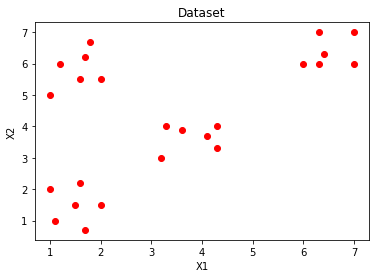

In [1]:
# Example dataset
"""
The dataset that we will be using to test the K-means algorithm contains 24 examples with 2 input 
features.
"""
# Importing the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Creating the dataset
X = np.array([[1,2],[1.1,1],[1.5,1.5],[1.6,2.2],[1.7,0.7],[2,1.5],
              [1,5],[1.2,6],[1.6,5.5],[1.7,6.2],[1.8,6.7],[2,5.5],
              [3.2,3],[3.3,4],[3.6,3.9],[4.1,3.7],[4.3,3.3],[4.3,4],
              [6,6],[6.3,6],[6.3,7],[6.4,6.3],[7,6],[7,7]])

# Printing the dataset shape
print('X:', X.shape)

# Plotting the dataset
plt.plot(X[:,0], X[:,1], 'ro')

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')

In [19]:
# K-Means Clustering
"""
In this section we derive the K-means clustering algorithm using simple numpy functions. The function
takes in the examples X and the number of clusters K as parameters, and returns the squared distance
cost, the centroids and the cluster the examples are assigned to.
"""

def K_Means(X, K):
    # Importing the libraries
    import numpy as np
    
    # Perform K-means 10 times with different random initializations
    cost_best =1e100 # Initialize the best cost to a very large value
    for num_iter in range (10):      
        # Initialize the centroids to K random examples 
        X_shuffled = np.array(X)
        np.random.shuffle(X_shuffled)
        centroids = X_shuffled[:K, :]
        
        # Perform K-means
        prev_cc = np.zeros((X.shape[0], 1)) # Initialize the previous closest centroids             
        for num_iter in range (1000):            
            # Compute the squared distance between the examples and centroids
            distance2 = np.zeros((X.shape[0], K))            
            for i in range (X.shape[0]):
                for j in range (K):
                    distance2[i, j] = np.sum(np.square(X[i, :] - centroids[j, :]))

            # Assign the examples to the closest centroid
            cc = np.argmin(distance2, axis = 1).reshape(-1,1)
            
            # Update the centroids
            if np.array_equal(cc, prev_cc):
                break
            else:
                prev_cc = np.array(cc)
                for i in range (K): 
                    idx = cc == i
                    centroids[i, :] = np.sum(X * idx, axis = 0) / np.sum(idx)

        # Calculate the sum of the squared distance cost between every example and its closest centroid
        cost = 0
        for i in range (K):
            idx = cc == i
            cost = cost + np.sum(np.square(X - centroids[i,:]) * idx)

        # Select the optimal K-means result from the 10 attempted
        if cost < cost_best:
            cost_best = cost
            centroids_best = centroids
            cc_best = cc.ravel()
    
    # Return the cost, the centroids, and the clusters the examples are assigned
    return cost_best, centroids_best, cc_best

Squared distance cost: 9.02333333333

Centroids:
 [[ 1.48333333  1.48333333]
 [ 3.8         3.65      ]
 [ 6.5         6.38333333]
 [ 1.55        5.81666667]]

Clusters assigned to X:  [0 0 0 0 0 0 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2]


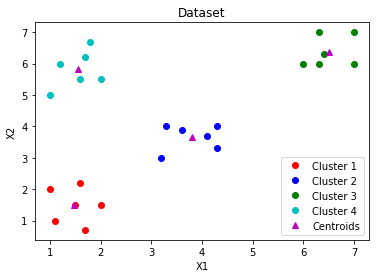

In [20]:
# K-means Clustering
"""
Run the K-means clustering algorithm derived above.
"""

# Applying the K-means algorithm to the dataset
cost, centroids, cc = K_Means(X, 4)

# Printing the cost, the centroids, and the clusters the examples are assigned
print('Squared distance cost:', cost)
print('\nCentroids:\n', centroids)
print('\nClusters assigned to X: ', cc)

# Plotting the clusters and centroids
plt.plot(X[cc==0,0], X[cc==0,1], 'ro', label = 'Cluster 1')
plt.plot(X[cc==1,0], X[cc==1,1], 'bo', label = 'Cluster 2')
plt.plot(X[cc==2,0], X[cc==2,1], 'go', label = 'Cluster 3')
plt.plot(X[cc==3,0], X[cc==3,1], 'co', label = 'Cluster 4')
plt.plot(centroids[:,0], centroids[:,1], 'm^', label = 'Centroids')

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

Squared distance cost: 9.02333333333

Centroids:
 [[ 1.55        5.81666667]
 [ 6.5         6.38333333]
 [ 1.48333333  1.48333333]
 [ 3.8         3.65      ]]

Clusters assigned to X: [2 2 2 2 2 2 0 0 0 0 0 0 3 3 3 3 3 3 1 1 1 1 1 1]


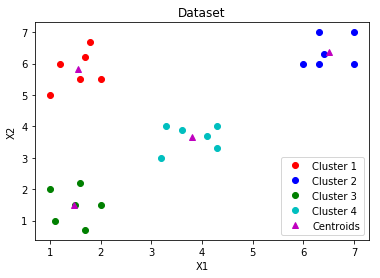

In [21]:
# K-Means Clustering w/ sklearn
"""
Here instead of using our own function, we run the K-means clustering algorithm from the sklearn library.
"""

from sklearn.cluster import KMeans

# Creating and fitting the K-means algorithm to the dataset
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
cc = kmeans.predict(X)

# Printing the cost, the centroids, and the clusters the examples are assigned
print('Squared distance cost:', kmeans.inertia_)
print('\nCentroids:\n', kmeans.cluster_centers_)
print('\nClusters assigned to X:', kmeans.labels_)

# Plotting the clusters and centroids
plt.plot(X[cc==0,0], X[cc==0,1], 'ro', label = 'Cluster 1')
plt.plot(X[cc==1,0], X[cc==1,1], 'bo', label = 'Cluster 2')
plt.plot(X[cc==2,0], X[cc==2,1], 'go', label = 'Cluster 3')
plt.plot(X[cc==3,0], X[cc==3,1], 'co', label = 'Cluster 4')
plt.plot(centroids[:,0], centroids[:,1], 'm^', label = 'Centroids')

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()